In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load your local dataset
# Replace 'mall_customers.csv' with your actual file name/path
try:
    df = pd.read_csv('mall_customers.csv')
    print("✅ Dataset loaded successfully from local file!")
except FileNotFoundError:
    # Try common alternative names
    try:
        df = pd.read_csv('Mall_Customers.csv')
        print("✅ Dataset loaded successfully as 'Mall_Customers.csv'!")
    except FileNotFoundError:
        print("⚠️  Please check your file name and path.")
        print("Common file names: 'mall_customers.csv', 'Mall_Customers.csv', 'Mall_Customers_data.csv'")
        # List files in current directory to help user
        import os
        print("\n📁 Files in current directory:")
        for file in os.listdir('.'):
            if file.endswith('.csv'):
                print(f"  - {file}")

✅ Dataset loaded successfully from local file!


In [4]:
# Basic dataset information
print("🔍 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 10 rows:")
print(df.head(10))
print("\nData types:")
print(df.dtypes)

🔍 DATASET OVERVIEW
Dataset shape: (200, 5)
Rows: 200, Columns: 5

Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 10 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

Data types:
CustomerID                 int

In [5]:
# Data quality checks
print("🔎 DATA QUALITY CHECKS")
print("=" * 50)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
for col, missing_count in missing_values.items():
    print(f"  {col}: {missing_count} missing values")

print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check basic statistics
print("\n📊 BASIC STATISTICS:")
print(df.describe())

🔎 DATA QUALITY CHECKS
Missing values per column:
  CustomerID: 0 missing values
  Gender: 0 missing values
  Age: 0 missing values
  Annual Income (k$): 0 missing values
  Spending Score (1-100): 0 missing values

Total missing values: 0
Duplicate rows: 0

📊 BASIC STATISTICS:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [6]:
# Create a clean copy and standardize column names
df_clean = df.copy()

# Standardize column names (remove spaces, special characters, make consistent)
df_clean.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

print("🔄 COLUMN NAME STANDARDIZATION")
print("=" * 50)
print("Standardized column names:", df_clean.columns.tolist())
print("\nFirst 5 rows:")
print(df_clean.head())

🔄 COLUMN NAME STANDARDIZATION
Standardized column names: ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

First 5 rows:
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


📊 UNIVARIATE ANALYSIS - NUMERICAL FEATURES


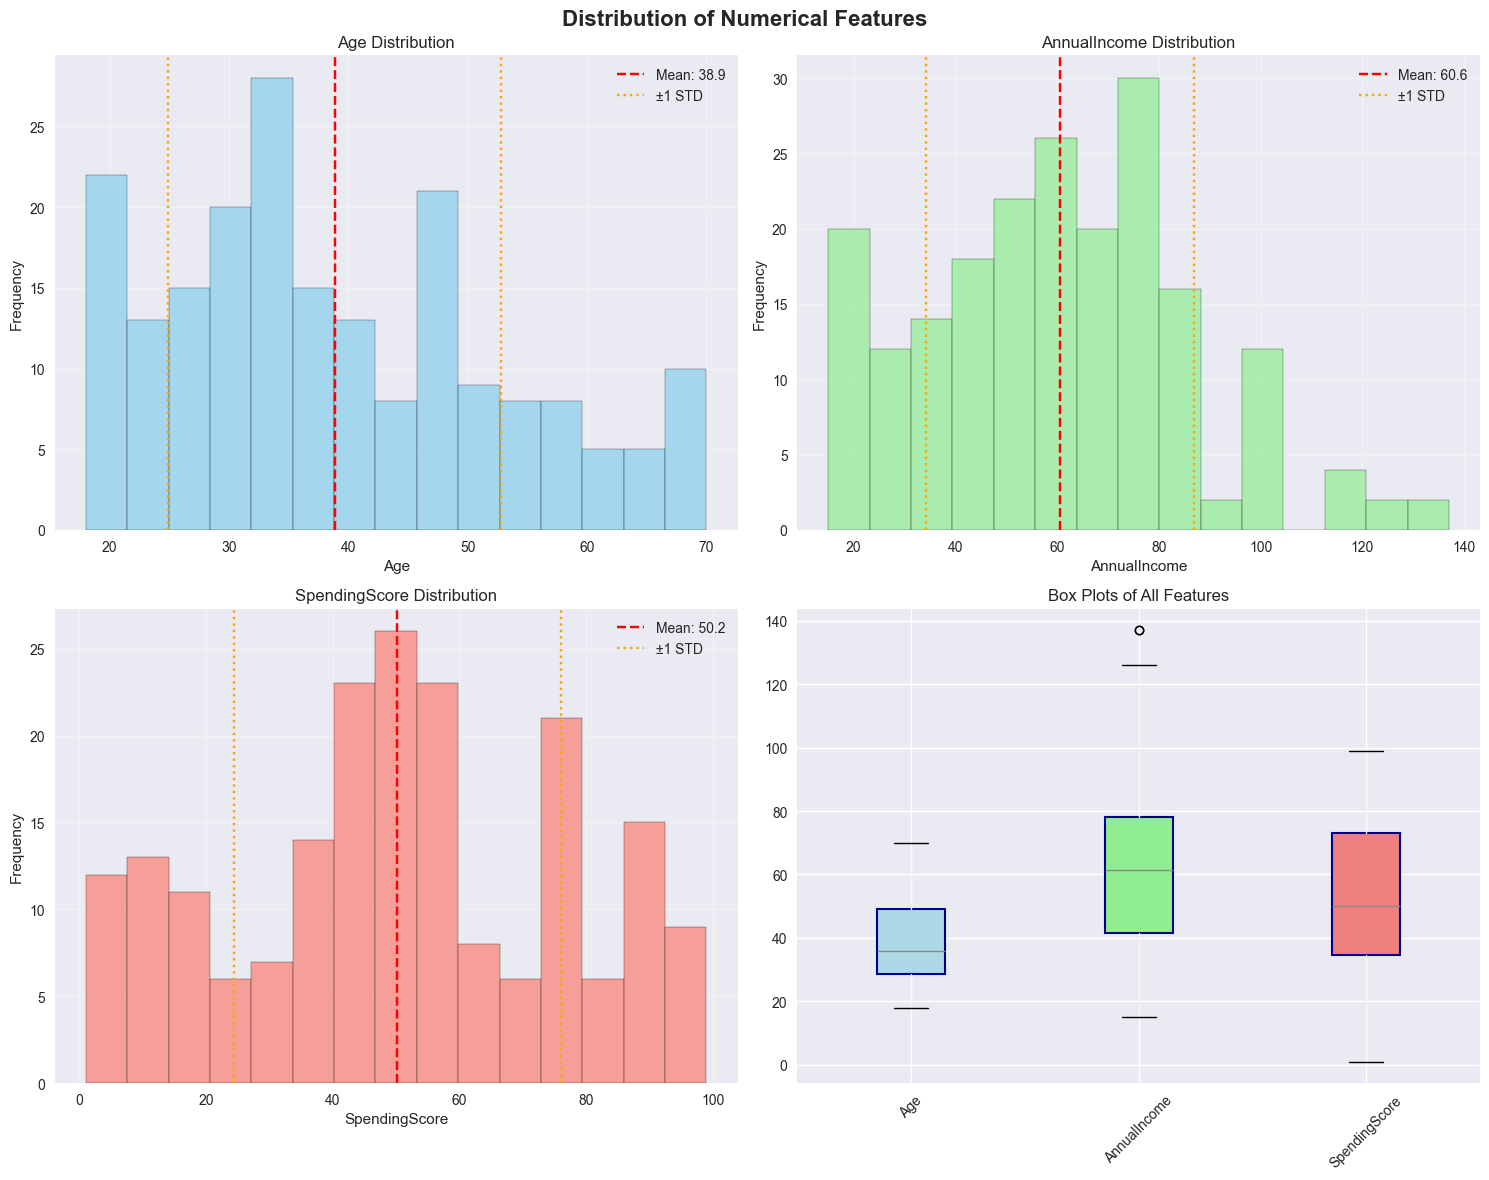


📈 DETAILED STATISTICS:
              Age  AnnualIncome  SpendingScore
count  200.000000    200.000000     200.000000
mean    38.850000     60.560000      50.200000
std     13.969007     26.264721      25.823522
min     18.000000     15.000000       1.000000
25%     28.750000     41.500000      34.750000
50%     36.000000     61.500000      50.000000
75%     49.000000     78.000000      73.000000
max     70.000000    137.000000      99.000000


In [7]:
import matplotlib.pyplot as plt

# Comprehensive univariate analysis
print("📊 UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("=" * 50)

# Create a better layout - 2 rows, 2 columns instead of 2x3
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

numerical_cols = ['Age', 'AnnualIncome', 'SpendingScore']
colors = ['skyblue', 'lightgreen', 'salmon']

# Create histograms in first row
for i, col in enumerate(numerical_cols):
    if i < 2:  # First two histograms in first row
        axes[0,i].hist(df_clean[col], bins=15, alpha=0.7, color=colors[i], edgecolor='black')
        axes[0,i].set_xlabel(col)
        axes[0,i].set_ylabel('Frequency')
        axes[0,i].set_title(f'{col} Distribution')
        axes[0,i].grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = df_clean[col].mean()
        std_val = df_clean[col].std()
        axes[0,i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
        axes[0,i].axvline(mean_val + std_val, color='orange', linestyle=':', label=f'±1 STD')
        axes[0,i].axvline(mean_val - std_val, color='orange', linestyle=':')
        axes[0,i].legend()

# Third histogram in second row, first column
axes[1,0].hist(df_clean['SpendingScore'], bins=15, alpha=0.7, color='salmon', edgecolor='black')
axes[1,0].set_xlabel('SpendingScore')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('SpendingScore Distribution')
axes[1,0].grid(True, alpha=0.3)

# Add statistics for SpendingScore
mean_val = df_clean['SpendingScore'].mean()
std_val = df_clean['SpendingScore'].std()
axes[1,0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
axes[1,0].axvline(mean_val + std_val, color='orange', linestyle=':', label=f'±1 STD')
axes[1,0].axvline(mean_val - std_val, color='orange', linestyle=':')
axes[1,0].legend()

# Box plot in second row, second column with custom colors
box_plot = df_clean[numerical_cols].boxplot(ax=axes[1,1], patch_artist=True)
axes[1,1].set_title('Box Plots of All Features')
axes[1,1].tick_params(axis='x', rotation=45)

# Manually set colors for each box
colors = ['lightblue', 'lightgreen', 'lightcoral']
for i, box in enumerate(box_plot.findobj(match=plt.matplotlib.patches.PathPatch)):
    # Set the facecolor of each box
    box.set_facecolor(colors[i % len(colors)])
    # Optional: set edge color
    box.set_edgecolor('darkblue')
    # Optional: set line width
    box.set_linewidth(1.5)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📈 DETAILED STATISTICS:")
print(df_clean[numerical_cols].describe())

👥 UNIVARIATE ANALYSIS - CATEGORICAL FEATURES


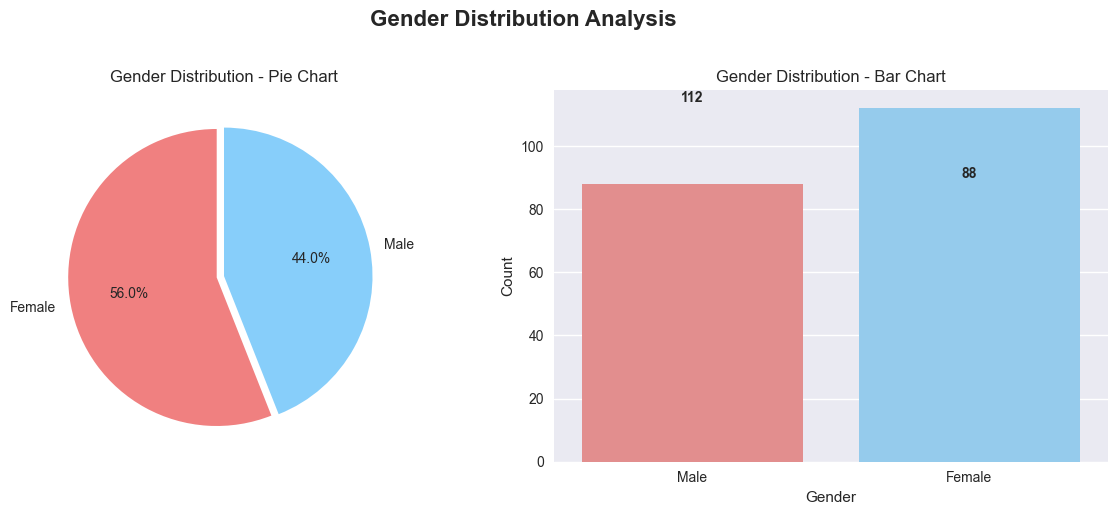

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Percentage distribution:
  Female: 56.0%
  Male: 44.0%


In [8]:
# Categorical features analysis
print("👥 UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("=" * 50)

plt.figure(figsize=(12, 5))
plt.suptitle('Gender Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

# Pie chart
plt.subplot(1, 2, 1)
gender_counts = df_clean['Gender'].value_counts()
colors = ['lightcoral', 'lightskyblue']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0))
plt.title('Gender Distribution - Pie Chart')

# Bar chart
plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='Gender', palette=colors)
plt.title('Gender Distribution - Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add value labels on bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Gender Distribution:")
print(gender_counts)
print(f"\nPercentage distribution:")
for gender, count in gender_counts.items():
    print(f"  {gender}: {count/len(df_clean)*100:.1f}%")

🔗 BIVARIATE ANALYSIS


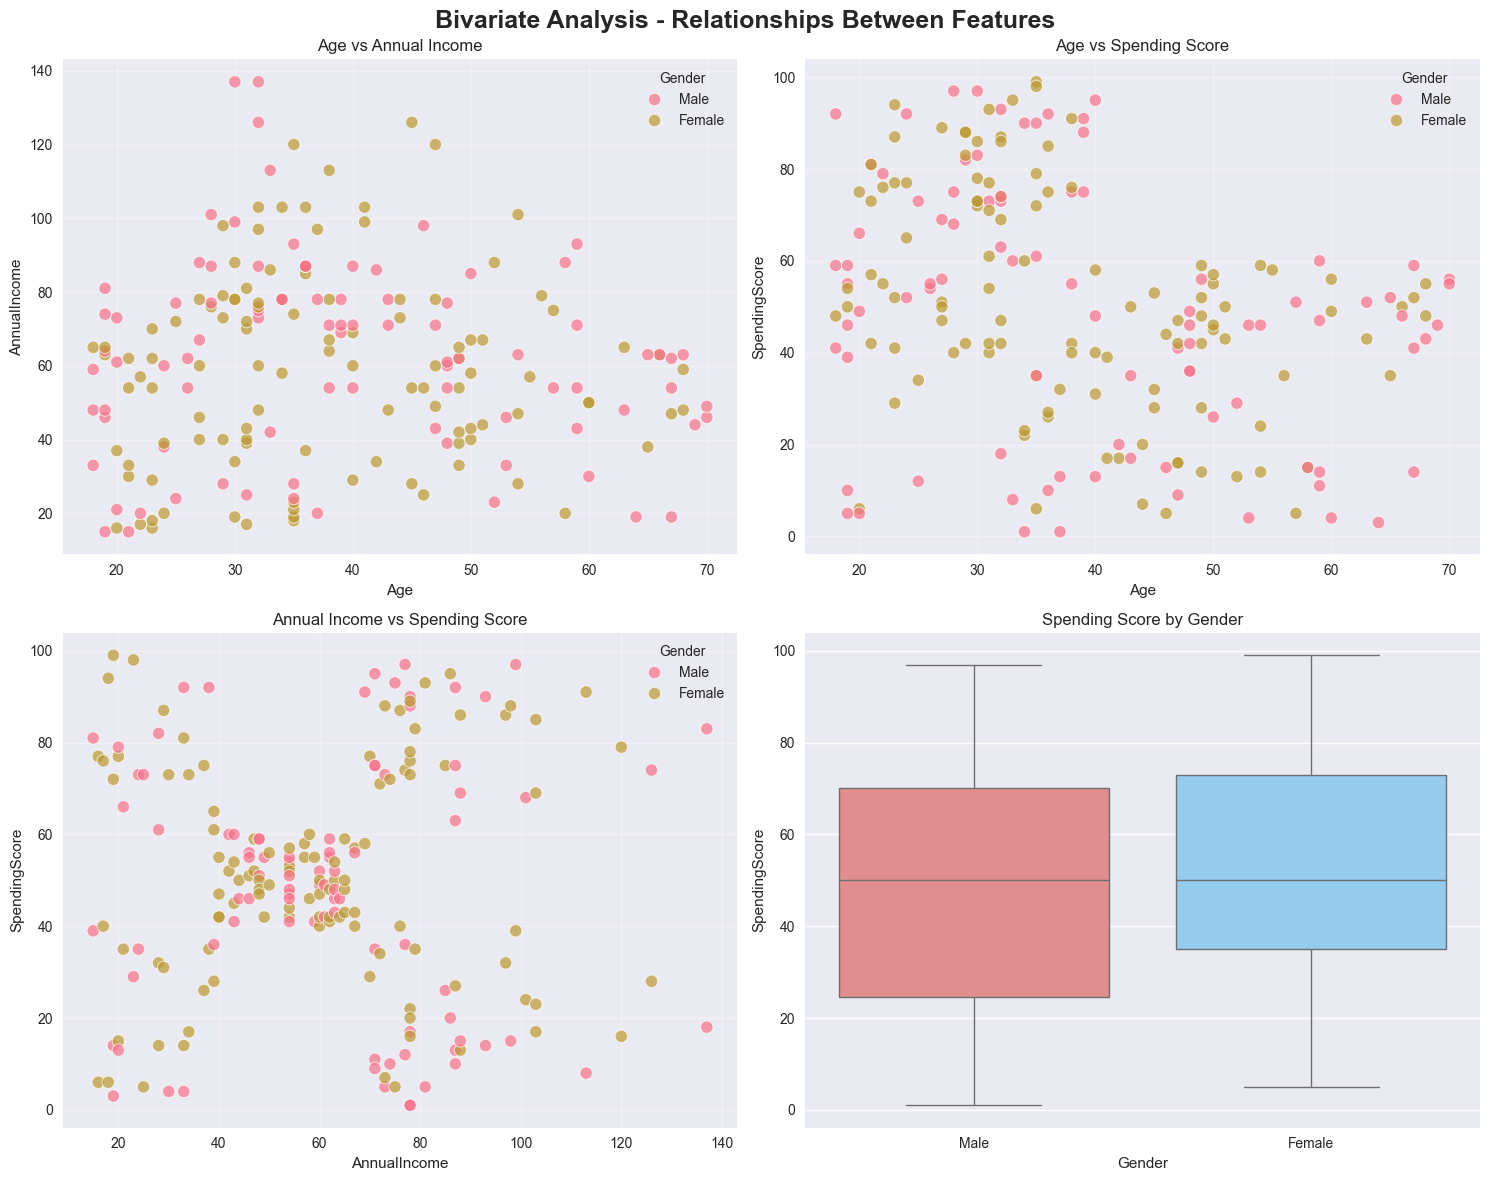

In [9]:
# Bivariate analysis - relationships between features
print("🔗 BIVARIATE ANALYSIS")
print("=" * 50)

plt.figure(figsize=(15, 12))
plt.suptitle('Bivariate Analysis - Relationships Between Features', fontsize=18, fontweight='bold', y=0.98)

# Age vs Annual Income
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_clean, x='Age', y='AnnualIncome', hue='Gender', alpha=0.7, s=80)
plt.title('Age vs Annual Income')
plt.grid(True, alpha=0.3)

# Age vs Spending Score
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_clean, x='Age', y='SpendingScore', hue='Gender', alpha=0.7, s=80)
plt.title('Age vs Spending Score')
plt.grid(True, alpha=0.3)

# Annual Income vs Spending Score
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_clean, x='AnnualIncome', y='SpendingScore', hue='Gender', alpha=0.7, s=80)
plt.title('Annual Income vs Spending Score')
plt.grid(True, alpha=0.3)

# Gender vs Spending Score
plt.subplot(2, 2, 4)
sns.boxplot(data=df_clean, x='Gender', y='SpendingScore', palette=['lightcoral', 'lightskyblue'])
plt.title('Spending Score by Gender')

plt.tight_layout()
plt.show()

📊 CORRELATION ANALYSIS


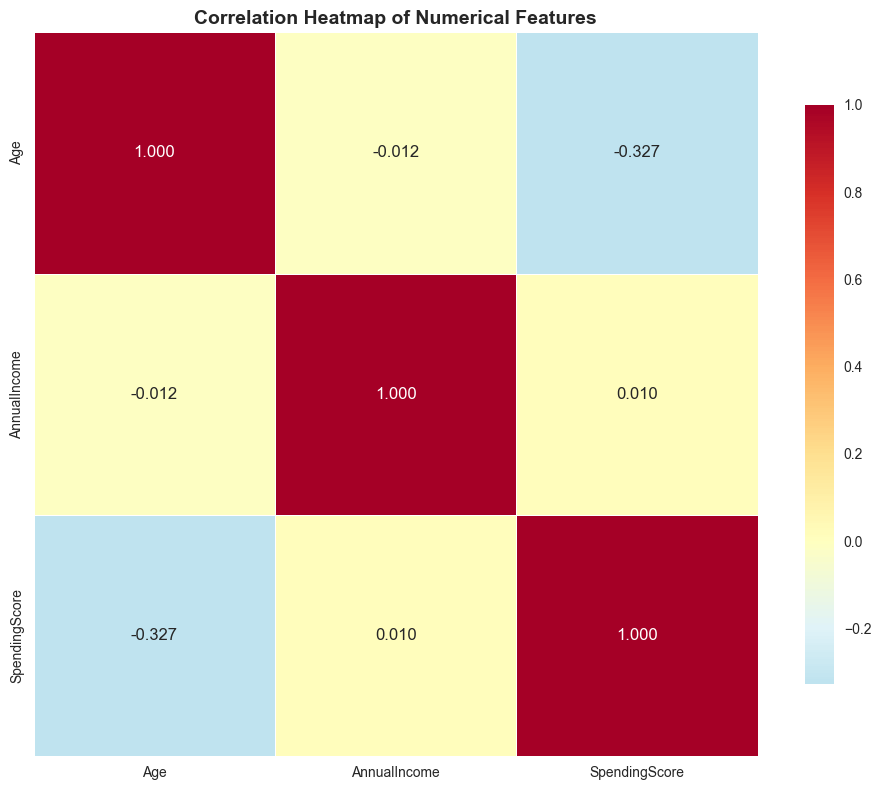

Correlation Matrix:
                    Age  AnnualIncome  SpendingScore
Age            1.000000     -0.012398      -0.327227
AnnualIncome  -0.012398      1.000000       0.009903
SpendingScore -0.327227      0.009903       1.000000

💡 CORRELATION INTERPRETATION
------------------------------
Age vs AnnualIncome: -0.012 (very weak negative correlation)
Age vs SpendingScore: -0.327 (weak negative correlation)
AnnualIncome vs SpendingScore: 0.010 (very weak positive correlation)


In [10]:
# Correlation analysis
print("📊 CORRELATION ANALYSIS")
print("=" * 50)

correlation_matrix = df_clean[['Age', 'AnnualIncome', 'SpendingScore']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 12})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

# Interpretation
print("\n💡 CORRELATION INTERPRETATION")
print("-" * 30)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        if abs(corr_value) < 0.2:
            strength = "very weak"
        elif abs(corr_value) < 0.4:
            strength = "weak"
        elif abs(correlation_value) < 0.6:
            strength = "moderate"
        elif abs(corr_value) < 0.8:
            strength = "strong"
        else:
            strength = "very strong"
            
        direction = "positive" if corr_value > 0 else "negative"
        
        print(f"{col1} vs {col2}: {corr_value:.3f} ({strength} {direction} correlation)")

In [11]:
# Feature engineering
print("🎯 FEATURE ENGINEERING")
print("=" * 50)

# Create age groups
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], 
                             bins=[17, 25, 35, 45, 55, 70],
                             labels=['18-25', '26-35', '36-45', '46-55', '56+'])
print("Age groups created:")
print(df_clean['AgeGroup'].value_counts().sort_index())

# Create income groups
df_clean['IncomeGroup'] = pd.cut(df_clean['AnnualIncome'],
                                bins=[0, 30, 60, 90, 140],
                                labels=['Low', 'Medium', 'High', 'Very High'])
print("\nIncome groups created:")
print(df_clean['IncomeGroup'].value_counts().sort_index())

# Create spending groups
df_clean['SpendingGroup'] = pd.cut(df_clean['SpendingScore'],
                                  bins=[0, 20, 40, 60, 80, 100],
                                  labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print("\nSpending groups created:")
print(df_clean['SpendingGroup'].value_counts().sort_index())

print("\nFirst 5 rows with new features:")
print(df_clean[['Age', 'AgeGroup', 'AnnualIncome', 'IncomeGroup', 'SpendingScore', 'SpendingGroup']].head())

🎯 FEATURE ENGINEERING
Age groups created:
AgeGroup
18-25    38
26-35    60
36-45    36
46-55    37
56+      29
Name: count, dtype: int64

Income groups created:
IncomeGroup
Low          32
Medium       66
High         80
Very High    22
Name: count, dtype: int64

Spending groups created:
SpendingGroup
Very Low     36
Low          27
Medium       75
High         32
Very High    30
Name: count, dtype: int64

First 5 rows with new features:
   Age AgeGroup  AnnualIncome IncomeGroup  SpendingScore SpendingGroup
0   19    18-25            15         Low             39           Low
1   21    18-25            15         Low             81     Very High
2   20    18-25            16         Low              6      Very Low
3   23    18-25            16         Low             77          High
4   31    26-35            17         Low             40           Low


In [12]:
# 🎯 TASK 8: CLUSTERING WITH K-MEANS
print("🎯 TASK 8: K-MEANS CLUSTERING")
print("=" * 50)

# Select features for clustering (Annual Income vs Spending Score)
X = df_clean[['AnnualIncome', 'SpendingScore']]
print("✅ Features selected for clustering:")
print(f"   - Annual Income (k$)")
print(f"   - Spending Score (1-100)")
print(f"\nDataset shape for clustering: {X.shape}")
print("\nFirst 5 rows:")
print(X.head())

🎯 TASK 8: K-MEANS CLUSTERING
✅ Features selected for clustering:
   - Annual Income (k$)
   - Spending Score (1-100)

Dataset shape for clustering: (200, 2)

First 5 rows:
   AnnualIncome  SpendingScore
0            15             39
1            15             81
2            16              6
3            16             77
4            17             40


📈 STEP 1: ELBOW METHOD FOR OPTIMAL K
----------------------------------------
Calculating inertia for K values from 1 to 10...
K=1: Inertia = 269981.28
K=2: Inertia = 181363.60
K=3: Inertia = 106348.37
K=4: Inertia = 73679.79
K=5: Inertia = 44448.46
K=6: Inertia = 37233.81
K=7: Inertia = 30241.34
K=8: Inertia = 25036.42
K=9: Inertia = 21916.79
K=10: Inertia = 20072.07


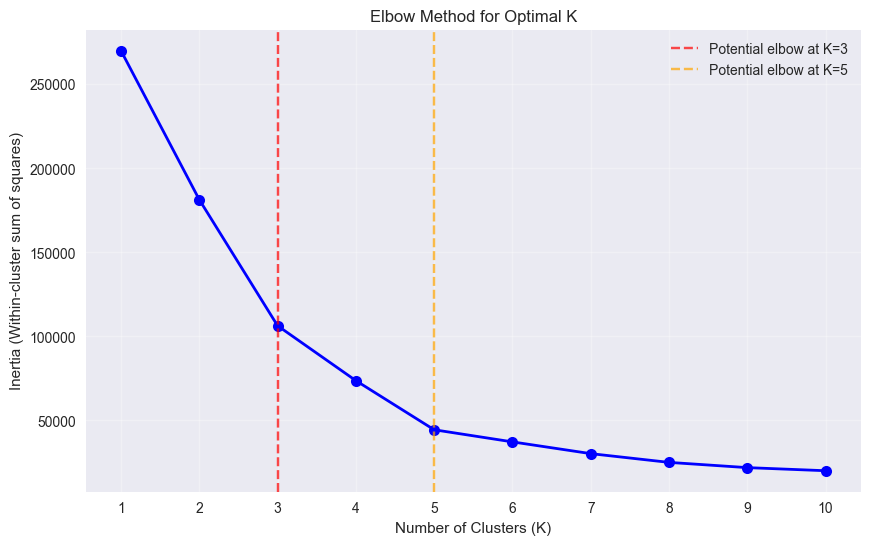

✅ Elbow curve plotted!
💡 Look for the 'elbow' point where inertia stops decreasing significantly
🔍 Based on the plot, K=5 appears to be a good choice (common for this dataset)


In [19]:
# Step 1: Find optimal K using Elbow Method
print("📈 STEP 1: ELBOW METHOD FOR OPTIMAL K")
print("-" * 40)

inertia = []
k_range = range(1, 11)

print("Calculating inertia for K values from 1 to 10...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    print(f"K={k}: Inertia = {kmeans.inertia_:.2f}")

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Highlight potential elbow points
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Potential elbow at K=3')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='Potential elbow at K=5')
plt.legend()

plt.show()

print("✅ Elbow curve plotted!")
print("💡 Look for the 'elbow' point where inertia stops decreasing significantly")
print("🔍 Based on the plot, K=5 appears to be a good choice (common for this dataset)")

In [20]:
# Step 2: Fit K-Means with optimal K
print("\n📊 STEP 2: FIT K-MEANS WITH OPTIMAL K")
print("-" * 40)

optimal_k = 5
print(f"Using K={optimal_k} for clustering...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X)

print(f"✅ K-Means clustering completed with K={optimal_k}")
print("\n📊 Cluster distribution:")
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
print(cluster_counts)

print(f"\n📈 Cluster sizes as percentages:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"  Cluster {cluster}: {count} customers ({percentage:.1f}%)")

print("\n🎯 Cluster centers (centroids):")
centroids = kmeans.cluster_centers_
for i, center in enumerate(centroids):
    print(f"  Cluster {i}: Annual Income = ${center[0]:.1f}k, Spending Score = {center[1]:.1f}")

print(f"\n📉 Final Inertia: {kmeans.inertia_:.2f}")


📊 STEP 2: FIT K-MEANS WITH OPTIMAL K
----------------------------------------
Using K=5 for clustering...
✅ K-Means clustering completed with K=5

📊 Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

📈 Cluster sizes as percentages:
  Cluster 0: 81 customers (40.5%)
  Cluster 1: 39 customers (19.5%)
  Cluster 2: 22 customers (11.0%)
  Cluster 3: 35 customers (17.5%)
  Cluster 4: 23 customers (11.5%)

🎯 Cluster centers (centroids):
  Cluster 0: Annual Income = $55.3k, Spending Score = 49.5
  Cluster 1: Annual Income = $86.5k, Spending Score = 82.1
  Cluster 2: Annual Income = $25.7k, Spending Score = 79.4
  Cluster 3: Annual Income = $88.2k, Spending Score = 17.1
  Cluster 4: Annual Income = $26.3k, Spending Score = 20.9

📉 Final Inertia: 44448.46



🎨 STEP 3: VISUALIZE CLUSTERS
----------------------------------------


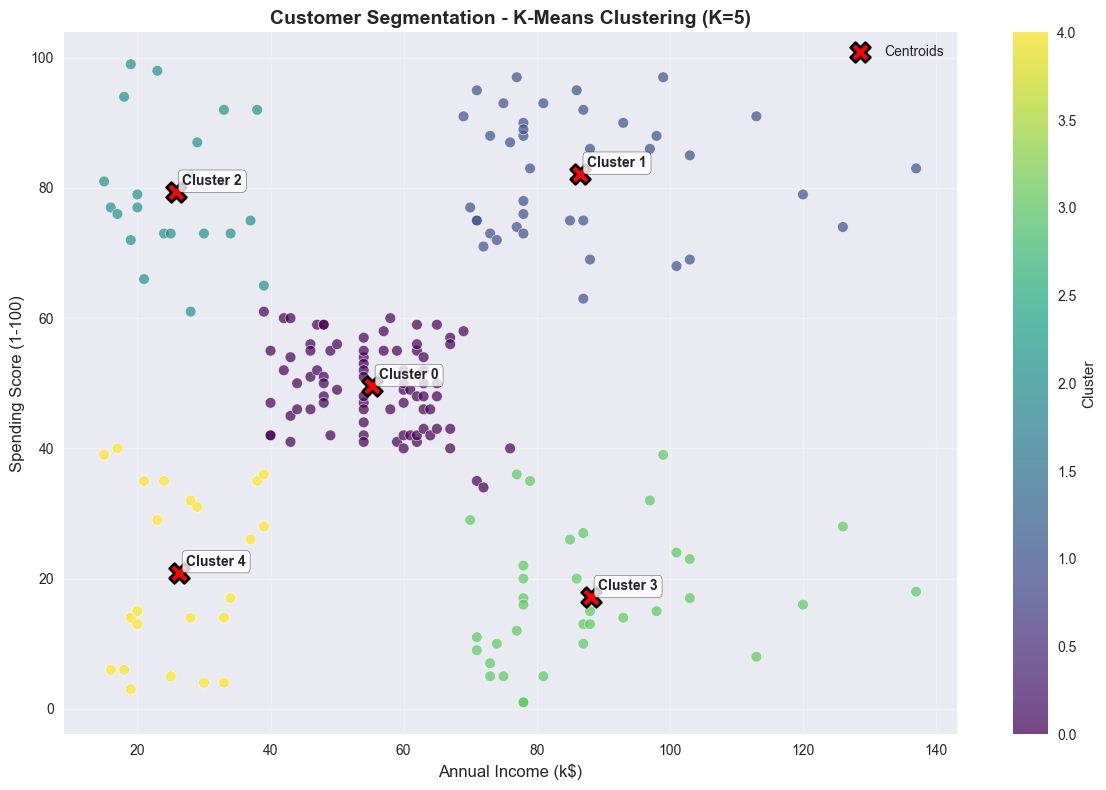

✅ Clusters visualized with color-coding!
💡 Each color represents a different customer segment
🔴 Red X markers show cluster centroids (center points)


In [21]:
# Step 3: Visualize clusters
print("\n🎨 STEP 3: VISUALIZE CLUSTERS")
print("-" * 40)

plt.figure(figsize=(12, 8))

# Create scatter plot with clusters
scatter = plt.scatter(df_clean['AnnualIncome'], df_clean['SpendingScore'], 
                     c=df_clean['Cluster'], cmap='viridis', s=60, alpha=0.7, 
                     edgecolors='white', linewidth=0.5)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, 
           c='red', label='Centroids', edgecolors='black', linewidth=2)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Segmentation - K-Means Clustering (K=5)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Add cluster annotations
for i, center in enumerate(centroids):
    plt.annotate(f'Cluster {i}', xy=(center[0], center[1]), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Clusters visualized with color-coding!")
print("💡 Each color represents a different customer segment")
print("🔴 Red X markers show cluster centroids (center points)")

In [22]:
# Step 4: Evaluate clustering performance
print("\n📊 STEP 4: CLUSTERING EVALUATION")
print("-" * 40)

# Calculate Silhouette Score
sil_score = silhouette_score(X, df_clean['Cluster'])
print(f"✅ Silhouette Score for K={optimal_k}: {sil_score:.3f}")

# Interpretation
print("\n💡 Silhouette Score Interpretation:")
print("Range: -1 (poor clustering) to +1 (excellent clustering)")
if sil_score > 0.7:
    print("   🟢 STRONG clustering structure")
elif sil_score > 0.5:
    print("   🟡 REASONABLE clustering structure")
elif sil_score > 0.25:
    print("   🟠 WEAK clustering structure")
else:
    print("   🔴 NO substantial clustering structure")

# Compare with other K values
print("\n🔍 Silhouette Scores for different K values:")
print("K | Silhouette Score | Interpretation")
print("-" * 45)
for k in range(2, 8):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_temp.fit_predict(X)
    sil_temp = silhouette_score(X, cluster_labels)
    
    if sil_temp > 0.7:
        interp = "Strong"
    elif sil_temp > 0.5:
        interp = "Reasonable"
    elif sil_temp > 0.25:
        interp = "Weak"
    else:
        interp = "Poor"
    
    print(f"{k} | {sil_temp:.3f}            | {interp}")

print(f"\n🎯 Our chosen K={optimal_k} has a silhouette score of {sil_score:.3f}")


📊 STEP 4: CLUSTERING EVALUATION
----------------------------------------
✅ Silhouette Score for K=5: 0.554

💡 Silhouette Score Interpretation:
Range: -1 (poor clustering) to +1 (excellent clustering)
   🟡 REASONABLE clustering structure

🔍 Silhouette Scores for different K values:
K | Silhouette Score | Interpretation
---------------------------------------------
2 | 0.297            | Weak
3 | 0.468            | Weak
4 | 0.493            | Weak
5 | 0.554            | Reasonable
6 | 0.540            | Reasonable
7 | 0.529            | Reasonable

🎯 Our chosen K=5 has a silhouette score of 0.554


In [24]:
# Step 5: Profile and interpret clusters
print("\n👥 STEP 5: CLUSTER PROFILING")
print("-" * 40)

# Analyze cluster characteristics
cluster_profile = df_clean.groupby('Cluster').agg({
    'AnnualIncome': ['mean', 'std', 'min', 'max'],
    'SpendingScore': ['mean', 'std', 'min', 'max'],
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'CustomerID': 'count'
}).round(2)

cluster_profile.columns = ['Income_Mean', 'Income_Std', 'Income_Min', 'Income_Max',
                          'Spending_Mean', 'Spending_Std', 'Spending_Min', 'Spending_Max',
                          'Age_Mean', 'Gender_Mode', 'Count']

print("📊 Cluster Profiles:")
print(cluster_profile)

# Create interpretation based on your centroids
print("\n" + "="*60)
print("💼 BUSINESS INTERPRETATION & CUSTOMER SEGMENTS:")
print("="*60)

# Based on your centroid values, let's interpret each cluster
segment_descriptions = {
    0: "📊 AVERAGE CUSTOMERS\n   Medium income, medium spending - Balanced shoppers",
    1: "⭐ PREMIUM CUSTOMERS\n   High income, high spending - Luxury buyers", 
    2: "🎯 HIGH-SPENDING MIDDLE CLASS\n   Medium-high income, high spending - Aspirational shoppers",
    3: "💼 CONSERVATIVE HIGH-INCOME\n   High income, low spending - Cautious investors",
    4: "💰 BUDGET-CONSCIOUS\n   Low income, low spending - Value seekers"
}

print(f"\n🎯 SILHOUETTE SCORE: {sil_score:.3f} (Reasonable Clustering Structure)")
print("This indicates well-defined, distinct customer segments!\n")

for cluster in sorted(df_clean['Cluster'].unique()):
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    income_mean = cluster_data['AnnualIncome'].mean()
    spending_mean = cluster_data['SpendingScore'].mean()
    age_mean = cluster_data['Age'].mean()
    count = len(cluster_data)
    
    print(f"\n🔹 {segment_descriptions[cluster]}")
    print(f"   Customers: {count} ({count/len(df_clean)*100:.1f}%)")
    print(f"   Average Income: ${income_mean:.1f}k")
    print(f"   Average Spending Score: {spending_mean:.1f}/100")
    print(f"   Average Age: {age_mean:.1f} years")
    
    # Marketing recommendations based on cluster characteristics
    if cluster == 0:  # Average customers
        print("   💡 Marketing: Balanced offers, loyalty programs, family packages")
    elif cluster == 1:  # Premium customers
        print("   💡 Marketing: Premium experiences, exclusivity, VIP treatment")
    elif cluster == 2:  # High-spending middle class
        print("   💡 Marketing: Trendy products, social status appeals, installment plans")
    elif cluster == 3:  # Conservative high-income
        print("   💡 Marketing: Quality assurance, investment value, long-term benefits")
    elif cluster == 4:  # Budget-conscious
        print("   💡 Marketing: Discounts, value deals, budget-friendly options")


👥 STEP 5: CLUSTER PROFILING
----------------------------------------
📊 Cluster Profiles:
         Income_Mean  Income_Std  Income_Min  Income_Max  Spending_Mean  \
Cluster                                                                   
0              55.30        8.99          39          76          49.52   
1              86.54       16.31          69         137          82.13   
2              25.73        7.57          15          39          79.36   
3              88.20       16.40          70         137          17.11   
4              26.30        7.89          15          39          20.91   

         Spending_Std  Spending_Min  Spending_Max  Age_Mean Gender_Mode  Count  
Cluster                                                                         
0                6.53            34            61     42.72      Female     81  
1                9.36            63            97     32.69      Female     39  
2               10.50            61            99     25.27 

In [18]:
# 🎤 INTERVIEW QUESTIONS - READY TO ANSWER!
print("🎤 INTERVIEW QUESTIONS - K-MEANS CLUSTERING")
print("=" * 60)

questions_answers = {
    "1. How does K-Means clustering work?": 
        "K-Means partitions data into K clusters by minimizing within-cluster variance. It works by:\n"
        "   - Randomly initializing K centroids\n"
        "   - Assigning points to nearest centroid\n"
        "   - Updating centroids to cluster means\n"
        "   - Repeating until convergence",
    
    "2. What is the Elbow method?": 
        "The Elbow method plots inertia (within-cluster sum of squares) against different K values.\n"
        "We look for the 'elbow' point where adding more clusters doesn't significantly reduce inertia.",
    
    "3. What are the limitations of K-Means?": 
        "- Requires specifying K in advance\n"
        "- Sensitive to initial centroid positions\n"
        "- Assumes spherical clusters of similar size\n"
        "- Struggles with non-convex clusters\n"
        "- Sensitive to outliers",
    
    "4. How does initialization affect results?": 
        "Different random initializations can lead to different local optima.\n"
        "We use multiple initializations (n_init) and choose the best result.",
    
    "5. What is inertia in K-Means?": 
        f"Inertia = {kmeans.inertia_:.2f} (sum of squared distances to nearest cluster center)\n"
        "Lower inertia means tighter clusters.",
    
    "6. What is Silhouette Score?": 
        f"Measures how similar objects are to their own cluster vs other clusters.\n"
        f"Range: -1 (poor) to +1 (excellent). Our score: {sil_score:.3f}",
    
    "7. How do you choose the right number of clusters?": 
        "- Elbow method (inertia vs K)\n"
        "- Silhouette analysis\n"
        "- Domain knowledge\n"
        "- Business requirements",
    
    "8. What's the difference between clustering and classification?": 
        "Clustering: Unsupervised, finds natural groupings without labels\n"
        "Classification: Supervised, predicts known labels from training data"
}

for question, answer in questions_answers.items():
    print(f"\n{question}")
    print("-" * len(question))
    print(answer)
    print()

🎤 INTERVIEW QUESTIONS - K-MEANS CLUSTERING

1. How does K-Means clustering work?
------------------------------------
K-Means partitions data into K clusters by minimizing within-cluster variance. It works by:
   - Randomly initializing K centroids
   - Assigning points to nearest centroid
   - Updating centroids to cluster means
   - Repeating until convergence


2. What is the Elbow method?
----------------------------
The Elbow method plots inertia (within-cluster sum of squares) against different K values.
We look for the 'elbow' point where adding more clusters doesn't significantly reduce inertia.


3. What are the limitations of K-Means?
---------------------------------------
- Requires specifying K in advance
- Sensitive to initial centroid positions
- Assumes spherical clusters of similar size
- Struggles with non-convex clusters
- Sensitive to outliers


4. How does initialization affect results?
------------------------------------------
Different random initializations can